Importing Libraries

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping

Loading Dataset directly into Train & Test parameters

In [ ]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.fashion_mnist.load_data()

Getting to know the data


In [ ]:
X_train.shape

(60000, 28, 28)

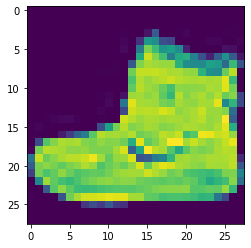

In [ ]:
# Plotting the image of the 1st row to see how it looks and what class it is (9 - Ankle Boot)
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [ ]:
Y_train[0]

9

The values are divided by 255 to standardize them since colors have a range of 0 to 255.

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
len(X_train[0])

28

In [ ]:
len(set(Y_test))

10

In [ ]:
# Obj
ann = Sequential()

# Hidden layers
ann.add(Flatten(input_shape=(28,28)))   # Here the image is of (28 x 28) pixels i.e. 28D so using flattening layer to convert it into 1D array 
ann.add(Dense(128,activation="relu"))
ann.add(Dense(64,activation="relu"))
ann.add(Dense(32,activation="relu"))


# Output layers
ann.add(Dense(10,activation="softmax"))   # As in total possibilities are [0,1,2...8,9] so total neurons are 10 , Softmax is used for multiclass classififcation

# diagram
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

Creating an object of early stopping to save the resources

In [ ]:
ES = EarlyStopping(mode="min",monitor="val_loss",patience=25,verbose=1)

In [ ]:
ann.fit(X_train,Y_train,validation_split=0.2,epochs=25,batch_size=64,callbacks=ES)

Epoch 1/25
750/750 [==============================] - 8s 10ms/step - loss: 0.5685 - accuracy: 0.8031 - val_loss: 0.4193 - val_accuracy: 0.8509
Epoch 2/25
750/750 [==============================] - 8s 11ms/step - loss: 0.3899 - accuracy: 0.8586 - val_loss: 0.4013 - val_accuracy: 0.8518
Epoch 3/25
750/750 [==============================] - 7s 9ms/step - loss: 0.3494 - accuracy: 0.8716 - val_loss: 0.3645 - val_accuracy: 0.8681
Epoch 4/25
750/750 [==============================] - 4s 6ms/step - loss: 0.3241 - accuracy: 0.8794 - val_loss: 0.4081 - val_accuracy: 0.8418
Epoch 5/25
750/750 [==============================] - 5s 6ms/step - loss: 0.3049 - accuracy: 0.8867 - val_loss: 0.3598 - val_accuracy: 0.8690
Epoch 6/25
750/750 [==============================] - 4s 6ms/step - loss: 0.2880 - accuracy: 0.8923 - val_loss: 0.3361 - val_accuracy: 0.8780
Epoch 7/25
750/750 [==============================] - 4s 5ms/step - loss: 0.2765 - accuracy: 0.8957 - val_loss: 0.3308 - val_accuracy: 0.8826
Epoc

In [ ]:
Y_prob = ann.predict(X_test)

313/313 [==============================] - 1s 2ms/step


Assigning the class based on the highest probability values for the numbers 0 to 9.

In [ ]:
Y_pred = Y_prob.argmax(axis=1)

The probability that the first row belongs to each of the [0-9] classes.

In [ ]:
Y_prob[0]

array([1.8610631e-06, 4.0219443e-06, 6.8793802e-06, 3.2166761e-05,
       1.7617293e-07, 1.3151170e-04, 3.4920934e-06, 4.8407752e-04,
       2.2943200e-06, 9.9933356e-01], dtype=float32)

In [ ]:
Y_pred

array([9, 2, 1, ..., 8, 1, 5])

Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.78      0.80      1000
           3       0.90      0.90      0.90      1000
           4       0.78      0.82      0.80      1000
           5       0.96      0.97      0.97      1000
           6       0.69      0.72      0.71      1000
           7       0.95      0.95      0.95      1000
           8       0.95      0.98      0.96      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

